<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/Kenya_student_funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##RANDOM FOREST CLSSIFIER

##Import the necessary libraries

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# ML model
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#Load the datset

In [ ]:
data=pd.read_csv('/content/kenyan_students_funding_2024_2025.csv')

##EDA

view the datset

In [ ]:
data.head()

,student_id,county,household_income,public_uni,program_cost_per_year,got_helb,helb_amount,scholarship_amount,other_support,can_afford_basics,financial_stress_level,likely_to_dropout,academic_performance,mental_health_risk
0,S001,Nairobi,35000,1,100000,1,40000,20000,10000,1,Medium,0,3.2,Medium
1,S002,Kisumu,15000,1,80000,0,0,30000,5000,0,High,1,2.8,High
2,S003,Nakuru,50000,0,180000,1,50000,0,20000,0,High,1,2.5,High
3,S004,Turkana,5000,1,60000,1,30000,40000,0,1,Low,0,3.5,Low
4,S005,Garissa,10000,1,90000,0,0,10000,3000,0,High,1,2.7,High


In [ ]:
data.tail()

,student_id,county,household_income,public_uni,program_cost_per_year,got_helb,helb_amount,scholarship_amount,other_support,can_afford_basics,financial_stress_level,likely_to_dropout,academic_performance,mental_health_risk
415,S153,Nakuru,50000,0,180000,1,50000,0,20000,0,High,1,2.6,High
416,S154,Turkana,5000,1,60000,1,25000,40000,0,1,Low,0,3.5,Low
417,S155,Garissa,10000,1,90000,0,0,10000,3000,0,High,1,2.8,High
418,S156,Mombasa,45000,1,120000,1,45000,15000,15000,1,Medium,0,3.0,Medium
419,S157,Kakamega,20000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe(include='all')

,student_id,county,household_income,public_uni,program_cost_per_year,got_helb,helb_amount,scholarship_amount,other_support,can_afford_basics,financial_stress_level,likely_to_dropout,academic_performance,mental_health_risk
count,420,418,417,417,416,416,415,415,414,414,414,414,413,413
unique,162,34,17,5,20,5,11,11,12,4,5,4,13,4
top,S001,Nairobi,10000,1,70000,1,0,0,0,1,High,0,3.2,High
freq,3,16,41,330,53,275,137,83,81,231,180,231,42,180


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   student_id              420 non-null    object
 1   county                  418 non-null    object
 2   household_income        417 non-null    object
 3   public_uni              417 non-null    object
 4   program_cost_per_year   416 non-null    object
 5   got_helb                416 non-null    object
 6   helb_amount             415 non-null    object
 7   scholarship_amount      415 non-null    object
 8   other_support           414 non-null    object
 9   can_afford_basics       414 non-null    object
 10  financial_stress_level  414 non-null    object
 11  likely_to_dropout       414 non-null    object
 12  academic_performance    413 non-null    object
 13  mental_health_risk      413 non-null    object
dtypes: object(14)
memory usage: 46.1+ KB


missing values

In [ ]:
data.isnull().sum()

,0
student_id,0
county,2
household_income,3
public_uni,3
program_cost_per_year,4
got_helb,4
helb_amount,5
scholarship_amount,5
other_support,6
can_afford_basics,6


Visualize Key Distributions

<Axes: xlabel='likely_to_dropout', ylabel='count'>

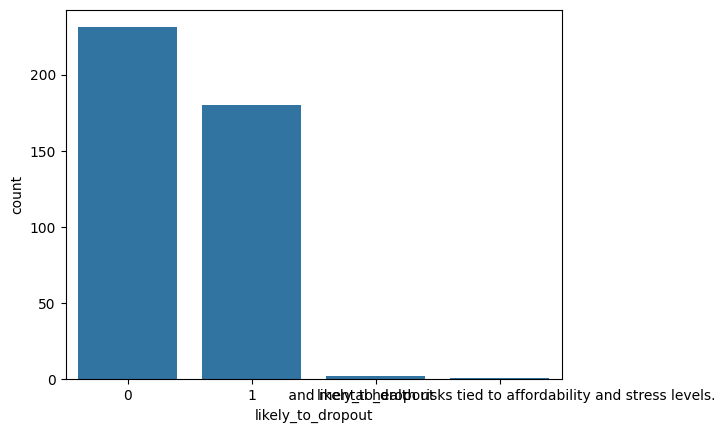

In [9]:
sns.countplot(x='likely_to_dropout', data=data)

sns.histplot(df['household_income'], bins=30)


<Figure size 1200x600 with 0 Axes>

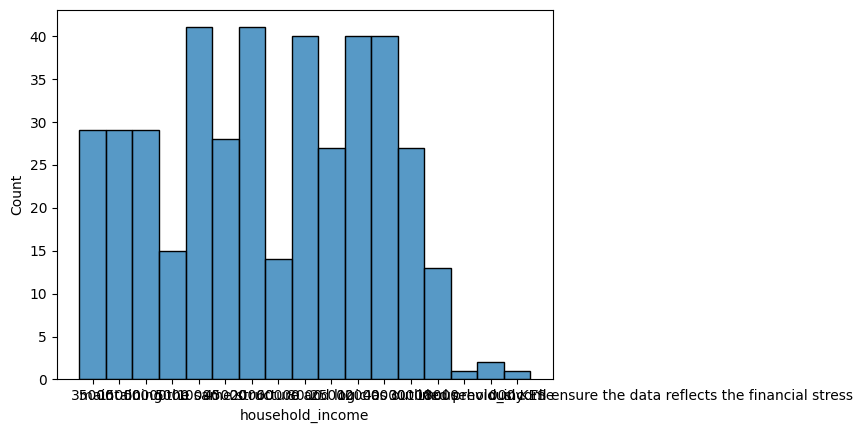

<Figure size 1200x600 with 0 Axes>

In [11]:
sns.histplot(data['household_income'], bins=30)
plt.figure(figsize=(12, 6))


/tmp/ipython-input-13-30328000.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


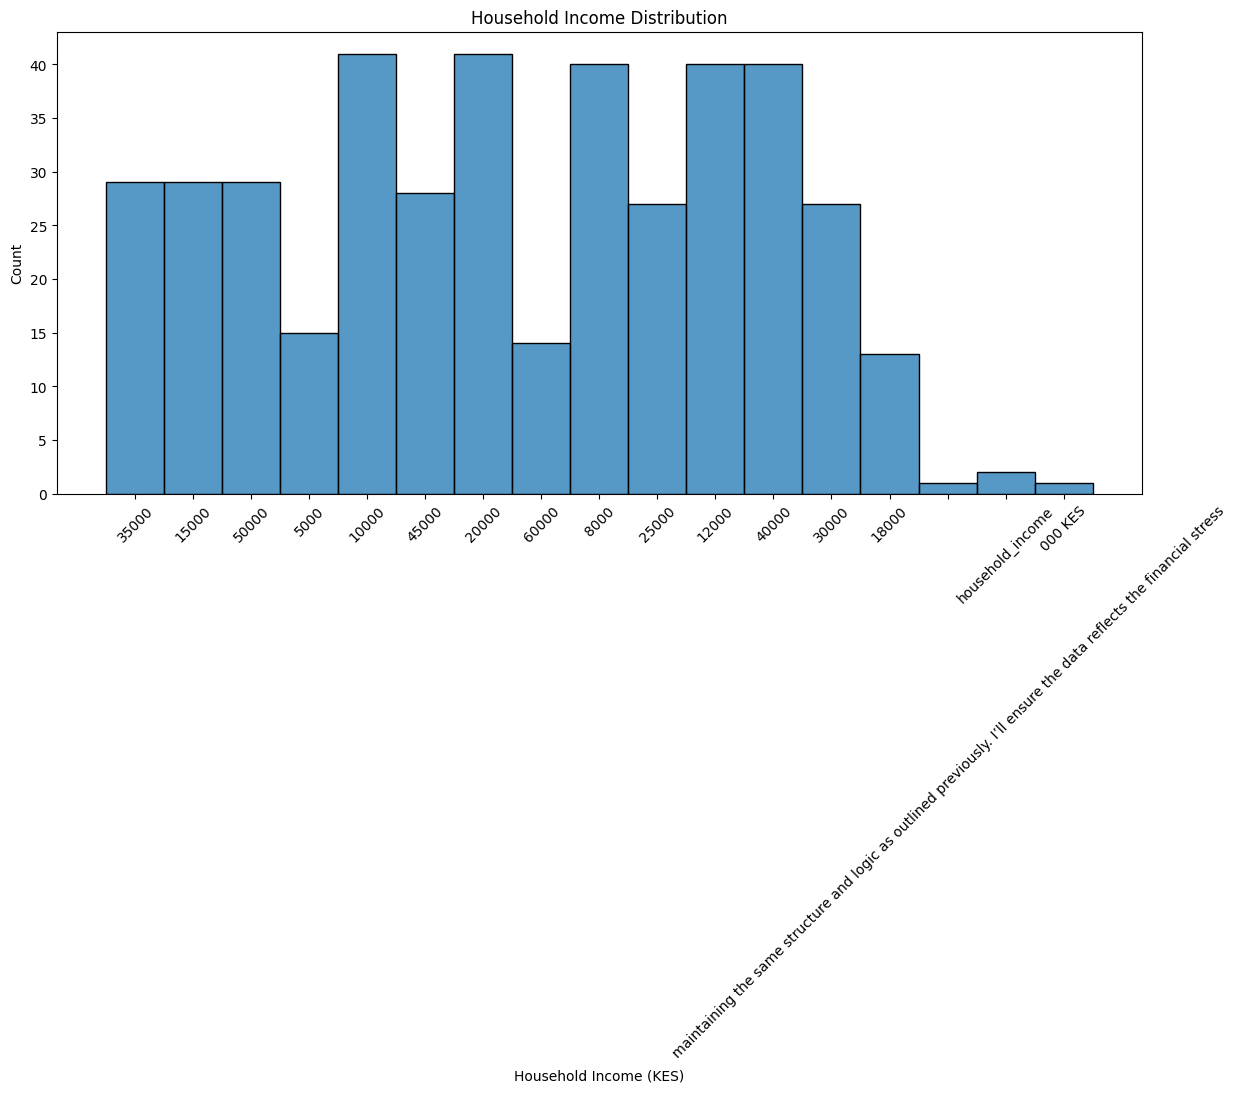

In [13]:
plt.figure(figsize=(14, 6))
sns.histplot(data['household_income'], bins=20, kde=False)

plt.xticks(rotation=45)  # rotate labels for readability
plt.title('Household Income Distribution')
plt.xlabel('Household Income (KES)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
